In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection

from keras.layers import Dense
from keras.models import Sequential
import keras.utils 

%matplotlib inline

In [2]:
categorical_attributes = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
target_variable = ['class']

Ucitati podatke iz datoteke car.csv za problem klasifikacije. Prikazati referentne statistike za atribute koristeci describe i head

In [3]:
df = pd.read_csv("car.csv")
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Kategoricke atribute enkodirati koristeci dummy enkodiranje.

In [5]:
X = df.drop(axis=1,columns='class')
X = pd.get_dummies(X, columns=categorical_attributes)
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


Ucitane podatke razdvojiti u dva skupa, X gde su svi atributi bez ciljne promenljive i y gde se nalazi ciljna promenljiva class. Dozvoljeno je koristiti sve bibliotecke funkcije.

In [6]:
y = df[['class']]
y['class'] = y['class'].map({'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3})
y = keras.utils.np_utils.to_categorical(y, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Podeliti podatke na skup za obucavanjei validaciju u razmeri 3:1

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75, random_state=42)
x_train.shape

(1296, 21)

Napraviti potpuno povezanu neuronsku prezu koja ima jedan skriveni sloj sa 32 neurona.

In [8]:
model = Sequential([
                    Dense(32, input_dim=21, activation='relu'),
                    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 836
Trainable params: 836
Non-trainable params: 0
_________________________________________________________________


Izvrsiti obucavanje prethodno definisane mreze na 10 epoha sa velicinom podsklupa 32. Kao gresku koristiti kategoricku kros entropijuj, ostale parametre odabrati proizvoljno. Postaviti i podatke za validaciju.

In [9]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
41/41 [==============================] - 2s 16ms/step - loss: 1.0863 - accuracy: 0.5687 - val_loss: 0.9097 - val_accuracy: 0.6782
Epoch 2/10
41/41 [==============================] - 0s 6ms/step - loss: 0.7896 - accuracy: 0.7068 - val_loss: 0.7645 - val_accuracy: 0.6806
Epoch 3/10
41/41 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.7076 - val_loss: 0.6727 - val_accuracy: 0.6875
Epoch 4/10
41/41 [==============================] - 0s 9ms/step - loss: 0.6071 - accuracy: 0.7222 - val_loss: 0.5968 - val_accuracy: 0.7245
Epoch 5/10
41/41 [==============================] - 0s 8ms/step - loss: 0.5404 - accuracy: 0.7654 - val_loss: 0.5276 - val_accuracy: 0.7778
Epoch 6/10
41/41 [==============================] - 0s 6ms/step - loss: 0.4826 - accuracy: 0.8048 - val_loss: 0.4714 - val_accuracy: 0.8194
Epoch 7/10
41/41 [==============================] - 0s 7ms/step - loss: 0.4358 - accuracy: 0.8418 - val_loss: 0.4293 - val_accuracy: 0.8426
Epoch 8/10
41/41 [=

Nacrtati na istoj slici kako se mejnala tacnost kroz epohe na skupovima za obucavanje i validaciju. Oznaciti u legendi sta oznacava koja linija.

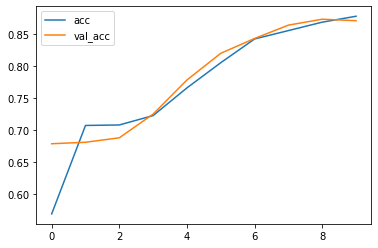

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])

Testirati nekoliko verzija arhitekture gde sa skrivenim slojem 1,2,3,10,32,64.

Obuciti svaku mrezu nad podacima za obucavanje i nacrtati kako se menjala tacnost kroz epohe nad skupovima za obucavanje i validaciju. Koristiti iste parametre pri obucavanju.

In [11]:
def build_network(layer_size):
    model = Sequential([
              Dense(layer_size, input_dim=21, activation='relu'),
              Dense(4, activation='softmax')
    ])
    return model

In [12]:
layer_sizes = [1, 2, 3, 10, 32, 64]
histories = []
epochs = 10
batch_size = 32

for ls in layer_sizes:
    model = build_network(ls)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, verbose=0, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
    histories.append(history)
    print(f'Model with layer_size={ls} done!')

Model with layer_size=1 done!
Model with layer_size=2 done!
Model with layer_size=3 done!
Model with layer_size=10 done!
Model with layer_size=32 done!
Model with layer_size=64 done!


Nacrtati kako se menjala tacnost kroz epohe svih modela na skupu za obucavanje (1. slika) i skupu za validaciju (2. slika). Na slikama oznaciti koja linija oznacava koju verziju arhitekture.

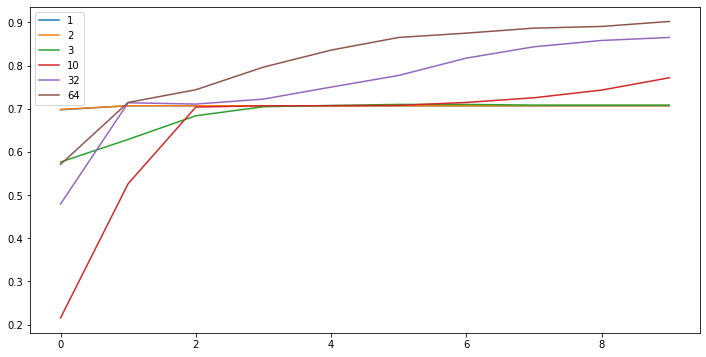

In [13]:
plt.figure(figsize=(12,6))
for hist in histories:
    plt.plot(hist.history['accuracy'])
    
plt.legend(layer_sizes)

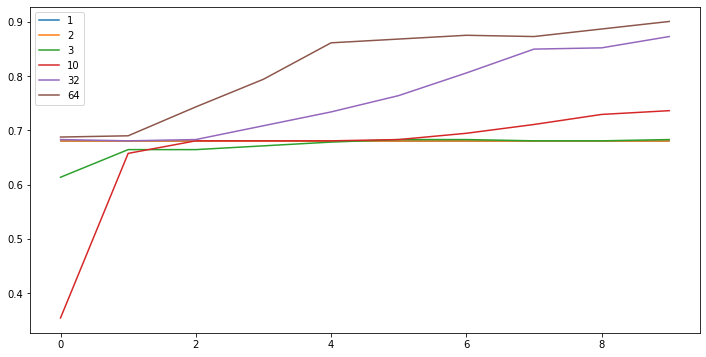

In [14]:
plt.figure(figsize=(12,6))
for hist in histories:
    plt.plot(hist.history['val_accuracy'])
    
plt.legend(layer_sizes)